In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.utils import np_utils
from keras.losses import *
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from sklearn.metrics import *

In [5]:
# dataTrain=pd.read_csv("HandChars32_150_Train.txt",sep="[0-9]{2,}#00#[0-9]{2,}#32#32#",engine="python")
# dataTest=pd.read_csv("HandChars32_50_Test.txt",sep="[0-9]{2,}#[0-9]{2,}#[0-9]{2,}#32#32#",engine="python")

dataTrain=pd.read_csv("HandChars32_150_Train.txt",sep="#",engine="python")
dataTest=pd.read_csv("HandChars32_50_Test.txt",sep="#",engine="python")
data=pd.concat([dataTrain,dataTest])
data=data.reset_index()
data.drop("index",inplace=True,axis=1)

X_data=data["Data"].copy()
Y_data=data["PatN"].copy()
Y=np_utils.to_categorical(Y_data)

In [6]:
X=[]
for i in X_data:
    X.append([float(j) for j in i])
X=np.array(X).reshape(5600,32,32,1)

In [11]:
datagen=ImageDataGenerator(
    width_shift_range=[-50,0,50,40,-30,60,70,80]
    #width_shift_range=0.35
)

In [ ]:
X=datagen.flow(X,y=Y)

In [ ]:
X

In [50]:
# dataTrain["Data"]=dataTrain["Data"].apply(lambda d:np.array(list(d),dtype="int").reshape(32,32))
# dataTest["Data"]=dataTest["Data"].apply(lambda d:np.array(list(d),dtype="int").reshape(32,32))

In [81]:
len(X[0])

32

In [11]:
len(Y[0])

28

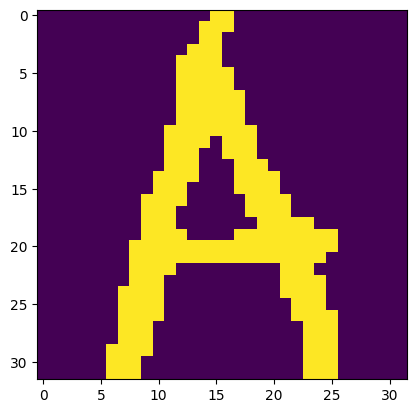

In [82]:
plt.imshow(X[0])

In [52]:
from sklearn.model_selection import  train_test_split

def baseline_model():
    model=Sequential()
    model.add(Convolution2D(32,(3,3),activation="relu"))
    model.add(MaxPooling2D(strides=(1,1)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(28,activation="softmax"))
    model.compile(loss=categorical_crossentropy,metrics=["accuracy"],optimizer="adam")
    return model

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
model=baseline_model()
model.fit(X_train,y_train,epochs=15,batch_size=200,verbose=2,validation_split=0.35)

Epoch 1/15
15/15 - 7s - loss: 1.9060 - accuracy: 0.4519 - val_loss: 0.8516 - val_accuracy: 0.7685 - 7s/epoch - 467ms/step
Epoch 2/15
15/15 - 5s - loss: 0.7764 - accuracy: 0.7727 - val_loss: 0.6312 - val_accuracy: 0.8125 - 5s/epoch - 321ms/step
Epoch 3/15
15/15 - 5s - loss: 0.5022 - accuracy: 0.8534 - val_loss: 0.4980 - val_accuracy: 0.8527 - 5s/epoch - 314ms/step
Epoch 4/15
15/15 - 5s - loss: 0.3429 - accuracy: 0.8966 - val_loss: 0.4453 - val_accuracy: 0.8673 - 5s/epoch - 311ms/step
Epoch 5/15
15/15 - 4s - loss: 0.2284 - accuracy: 0.9348 - val_loss: 0.4053 - val_accuracy: 0.8782 - 4s/epoch - 286ms/step
Epoch 6/15
15/15 - 4s - loss: 0.1589 - accuracy: 0.9523 - val_loss: 0.3969 - val_accuracy: 0.8782 - 4s/epoch - 281ms/step
Epoch 7/15
15/15 - 4s - loss: 0.1006 - accuracy: 0.9763 - val_loss: 0.3861 - val_accuracy: 0.8814 - 4s/epoch - 286ms/step
Epoch 8/15
15/15 - 4s - loss: 0.0766 - accuracy: 0.9842 - val_loss: 0.3588 - val_accuracy: 0.8897 - 4s/epoch - 287ms/step
Epoch 9/15
15/15 - 4s - 

In [56]:
predict_all=model.predict(X)

175/175 [==============================] - 3s 19ms/step


In [57]:
t_all=[]
for i in predict_all:
    t_all.append(np.argmax(i))
t_all=np.array(t_all)
y_all=[]
for i in Y:
    y_all.append(np.argmax(i))
y_all=np.array(y_all)
# y_test=np_utils.to_categorical(y_test)
print(classification_report(t_all,y_all))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       207
           1       0.93      0.95      0.94       195
           2       0.98      0.95      0.97       207
           3       0.93      0.93      0.93       199
           4       0.85      0.96      0.90       178
           5       0.94      0.99      0.96       188
           6       0.97      0.96      0.96       203
           7       0.94      0.94      0.94       200
           8       0.97      0.93      0.95       208
           9       0.98      0.88      0.93       224
          10       0.97      0.95      0.96       204
          11       0.95      0.95      0.95       202
          12       0.92      0.92      0.92       200
          13       0.98      0.98      0.98       202
          14       0.94      0.97      0.95       194
          15       0.93      0.98      0.95       188
          16       0.97      0.90      0.93       215
          17       0.96    

In [86]:
pd.to_pickle(model,"CNN.pkl")

In [58]:
test=model.predict(X_test)
t=[]
for i in test:
    t.append(np.argmax(i))
predict=np.array(t)

test=[]
for i in y_test:
    test.append(np.argmax(i))
test=np.array(test)
# y_test=np_utils.to_categorical(y_test)
print(classification_report(predict,test))

35/35 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.84      0.76      0.80        34
           2       0.96      0.93      0.95        29
           3       0.88      0.86      0.87        44
           4       0.72      0.92      0.81        37
           5       0.86      0.97      0.91        38
           6       0.88      0.85      0.87        34
           7       0.84      0.84      0.84        43
           8       0.93      0.87      0.90        30
           9       1.00      0.76      0.86        45
          10       0.93      0.87      0.90        45
          11       0.87      0.82      0.85        40
          12       0.82      0.82      0.82        50
          13       1.00      0.94      0.97        34
          14       0.85      0.89      0.87        37
          15       0.85      0.93      0.89        42
          16       0.92    

In [90]:
pd.to_pickle(model,"CNN.pkl")

In [70]:
t[0]

2

In [63]:
dataTrain["Data"].shape

(4200,)

35/35 [==============================] - 1s 19ms/step


array([[1.1168308e-11, 5.5450591e-09, 9.9342066e-01, ..., 1.9978363e-11,
        2.8048808e-11, 4.3402679e-07],
       [2.9541850e-10, 1.9149777e-05, 2.8003615e-03, ..., 1.5600371e-09,
        2.7932677e-07, 1.9308529e-05],
       [1.0084462e-09, 1.1639679e-07, 2.4451984e-07, ..., 8.9589690e-12,
        4.2699448e-08, 6.3126122e-09],
       ...,
       [9.6079921e-06, 2.0516269e-07, 1.6582852e-06, ..., 7.0076669e-05,
        2.2166248e-07, 2.7117159e-04],
       [5.7130892e-06, 3.7794427e-06, 5.6550925e-06, ..., 9.1404828e-10,
        1.1615558e-06, 1.3095734e-09],
       [5.7766059e-09, 3.3185961e-07, 3.3585981e-11, ..., 3.1608803e-08,
        6.9016772e-07, 1.1922045e-12]], dtype=float32)

In [87]:
a=pd.read_pickle("CNN.pkl")

35/35 [==============================] - 1s 13ms/step


array([[1.1168308e-11, 5.5450591e-09, 9.9342066e-01, ..., 1.9978363e-11,
        2.8048808e-11, 4.3402679e-07],
       [2.9541850e-10, 1.9149777e-05, 2.8003615e-03, ..., 1.5600371e-09,
        2.7932677e-07, 1.9308529e-05],
       [1.0084462e-09, 1.1639679e-07, 2.4451984e-07, ..., 8.9589690e-12,
        4.2699448e-08, 6.3126122e-09],
       ...,
       [9.6079921e-06, 2.0516269e-07, 1.6582852e-06, ..., 7.0076669e-05,
        2.2166248e-07, 2.7117159e-04],
       [5.7130892e-06, 3.7794427e-06, 5.6550925e-06, ..., 9.1404828e-10,
        1.1615558e-06, 1.3095734e-09],
       [5.7766059e-09, 3.3185961e-07, 3.3585981e-11, ..., 3.1608803e-08,
        6.9016772e-07, 1.1922045e-12]], dtype=float32)